In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np

Status code:  200


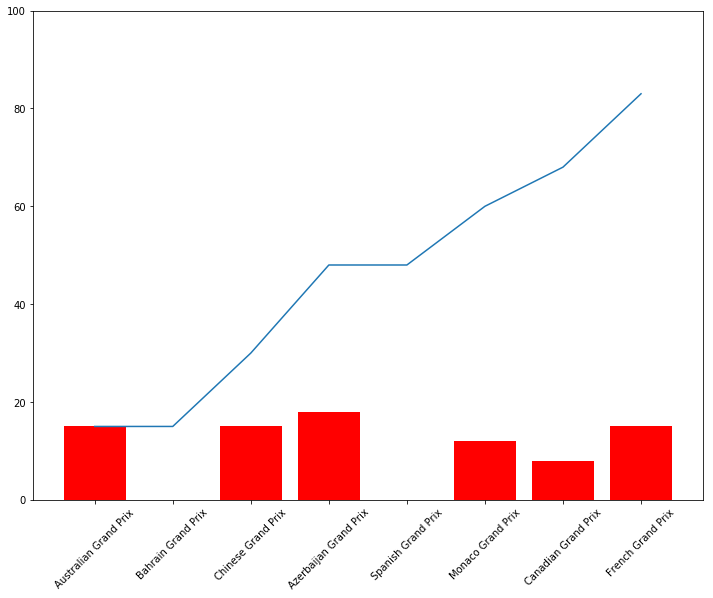

In [3]:
url = 'http://ergast.com/api/f1/2018/drivers/raikkonen/results.json'
r = requests.get(url)
print("Status code: ", r.status_code)

results = r.json()

races = []
raceindex = []
points = []

for race in results['MRData']['RaceTable']['Races']:
    races.append(race['raceName'])
    raceindex.append(int(race['round']))
    points.append(int(race['Results'][0]['points']))
    

points_cumsum = np.cumsum(points)

plt.figure(figsize=(12,9))

plt.plot(raceindex,points_cumsum)
plt.bar(raceindex, points, color='red')
plt.xticks(raceindex,races ,rotation=45)
plt.yticks(range(0,120,20))

plt.show()


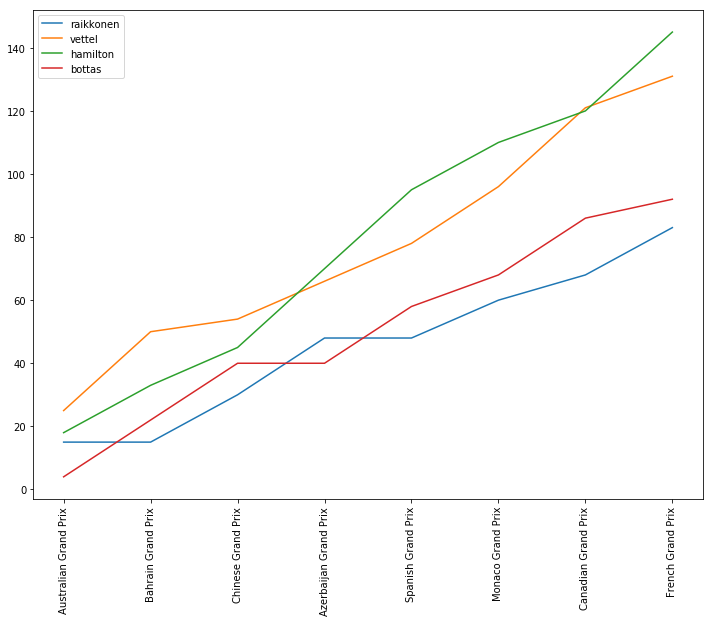

In [84]:

drivers=['raikkonen', 'vettel', 'hamilton', 'bottas']

plt.figure(figsize=(12,9))

for driver in drivers:

    url = 'http://ergast.com/api/f1/2018/drivers/'+driver+'/results.json'
    r = requests.get(url)

    results = r.json()

    races = []
    raceindex = []
    points = []

    for race in results['MRData']['RaceTable']['Races']:
        races.append(race['raceName'])
        raceindex.append(int(race['round']))
        points.append(int(race['Results'][0]['points']))


    points_cumsum = np.cumsum(points)

    plt.plot(raceindex,points_cumsum, label=driver)
    
plt.xticks(raceindex,races ,rotation=45)
plt.yticks(range(0,160,20))
plt.legend()
plt.show()

In [155]:
# This function takes in a list of drivers as an argument, then retrieves the points each driver for every race and finally
# plots a graph of the cumulative sum of the points.


def cumulative_points_graph(drivers):
    plt.figure(figsize=(12,9))

    for driver in drivers:

        url = 'http://ergast.com/api/f1/2018/drivers/'+driver+'/results.json'
        r = requests.get(url)

        results = r.json()

        races = []
        raceindex = []
        points = []

        for race in results['MRData']['RaceTable']['Races']:
            races.append(race['raceName'])
            raceindex.append(int(race['round']))
            points.append(int(race['Results'][0]['points']))


        points_cumsum = np.cumsum(points)
        raceindex = np.asarray(raceindex)

        plt.plot(raceindex,points_cumsum, label=driver)

    plt.xticks(raceindex-0.5,races ,rotation=45, fontsize=14)
    #plt.yticks(range(0,160,20))
    plt.legend(fontsize='large', shadow=True)
    plt.show()

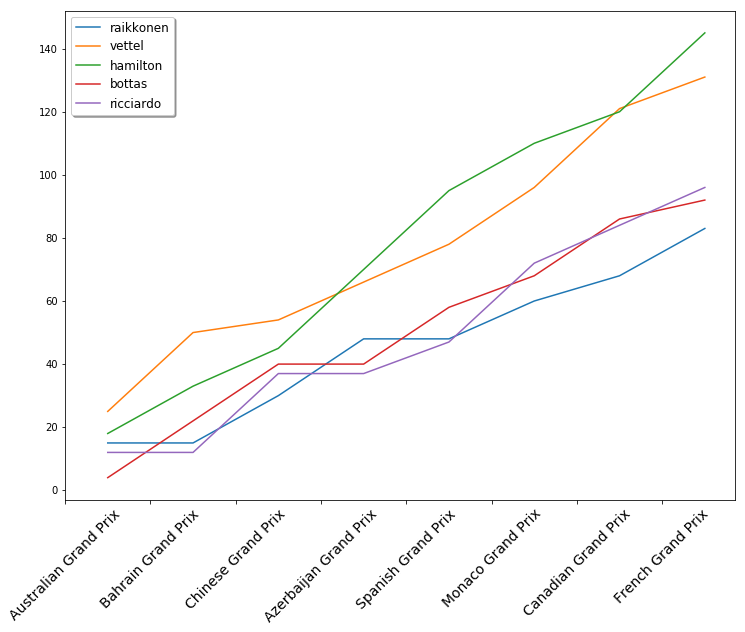

In [156]:
cumulative_points_graph(['raikkonen', 'vettel','hamilton', 'bottas','ricciardo'])

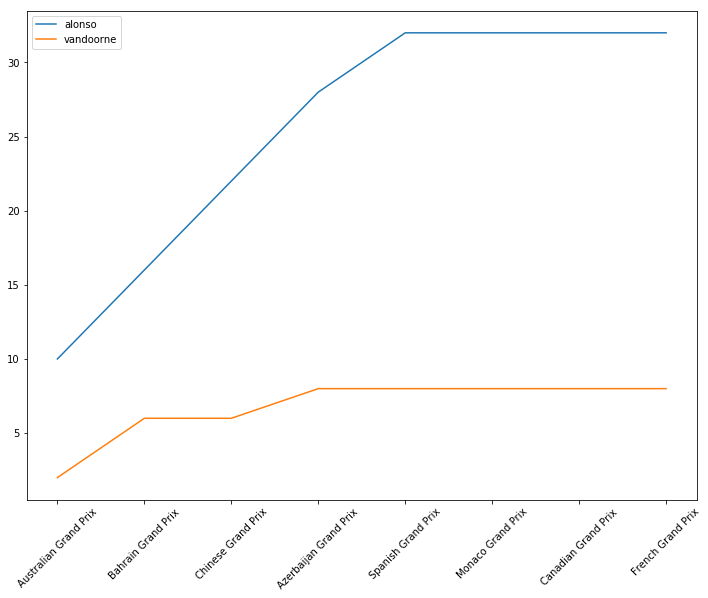

In [126]:
cumulative_points_graph(['alonso','vandoorne'])

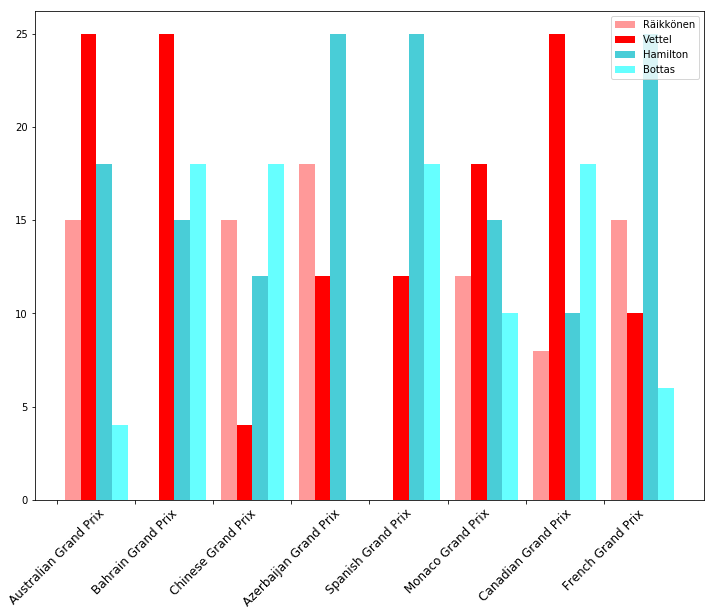

In [137]:
# Points gathered by Räikkönen, Vettel, Hamilton and Bottas in each race.

def get_points(driver):
    url = 'http://ergast.com/api/f1/2018/drivers/'+driver+'/results.json'
    r = requests.get(url)

    results = r.json()

    races = []
    raceindex = []
    points = []

    for race in results['MRData']['RaceTable']['Races']:
        
        points.append(int(race['Results'][0]['points']))
    
    return points

def get_races():
    url = 'http://ergast.com/api/f1/2018/drivers/'+driver+'/results.json'
    r = requests.get(url)

    results = r.json()

    races = []
    raceindex = []

    for race in results['MRData']['RaceTable']['Races']:
        races.append(race['raceName'])
        raceindex.append(int(race['round']))        
    
    return [races,raceindex]


points1 = get_points('raikkonen')
points2 = get_points('vettel')
points3 = get_points('hamilton')
points4 = get_points('bottas')

races = get_races()
x=np.asarray(races[1])
racename=races[0]

plt.figure(figsize=(12,9))

ax = plt.subplot(111)
ax.bar(x-0.3, points1,width=0.2,color='#FF9999',align='center', label='Räikkönen')
ax.bar(x-0.1, points2,width=0.2,color='r',align='center', label= 'Vettel')
ax.bar(x+0.1, points3,width=0.2,color='#49CDD7',align='center', label= 'Hamilton')
ax.bar(x+0.3, points4,width=0.2,color='#66FFFF',align='center', label= 'Bottas')
plt.xticks(x-0.5,racename ,rotation=45, fontsize=12)
plt.legend()

plt.show()

In [152]:
plt.Figure?